In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [82]:
def plot_3d(inp=None,pred=None, draw_line=False):
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig)
    fig.add_axes(ax)
    X = data2[:,:2].copy()
    X = np.concatenate([np.ones((47, 1)), X], axis=1)

    ax.set_xlabel("Size of House (square feet)")
    ax.set_ylabel("number of bedrooms")
    ax.set_zlabel("house prices")
    ax.scatter(data2[:,0], data2[:,1], data2[:,2], c="r", marker="o")
    if draw_line:
        ax.plot(inp[:,0] , inp[:,1], pred)
    plt.show()

In [15]:
data = np.loadtxt("data1.txt", delimiter=",")
data[0:10]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233],
       [ 8.3829, 11.886 ],
       [ 7.4764,  4.3483],
       [ 8.5781, 12.    ],
       [ 6.4862,  6.5987],
       [ 5.0546,  3.8166]])

In [22]:
X=data[:,0]
Y=data[:,1]

Text(0, 0.5, 'Profile')

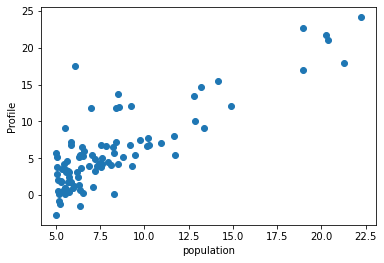

In [23]:
plt.scatter(X,Y)
plt.xlabel("population")
plt.ylabel("Profile")

In [109]:
class NormalLR:
    def __init__(self) ->None:
        self.X=None
        self.Y=None
        self.theta=None
    def fit(self,x,y):
        self.X=x
        if self.X.ndim==1:
            self.X=self.X.reshape(-1,1)
        self.X=np.concatenate([np.ones((self.X.shape[0],1)),self.X],axis=1)
        
        self.Y=y
        self.theta= self.calculate_theta()
        self.theta=self.theta.reshape(-1,1)
        
        return self.theta
    def predict(self,x):
        x=np.array(x)
        if x.ndim==1:
            x=x.reshape(-1,1)
        x=np.concatenate([np.ones((x.shape[0],1)),x],axis=1)
        return np.dot(x,self.theta)
    def calculate_theta(self):
        y_projection=np.dot(self.X.T,self.Y)
        con=np.dot(self.X.T,self.X)
        con_inv=np.linalg.pinv(con)
        theta_temp=np.dot(con_inv,y_projection)
        return theta_temp
        

In [110]:
model=NormalLR()
params=model.fit(X,Y)
params

array([[-3.89578088],
       [ 1.19303364]])

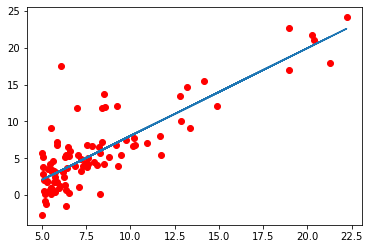

In [35]:
pred1=model.predict(X.reshape(-1,1))
plt.scatter(X,Y,color='red')
plt.plot(X,pred1)

## Another dataset
Housing prices having three column <br>
column 1: size of the house in square feet <br>
column 2: No. of bedrooms<br>
column 3: price of the house <br>

In [39]:
data2 = np.loadtxt("data2.txt", delimiter=",")
data2[0:5]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [76]:
X2 = data2[:,:2]  ## Storing first 2 columns in variable X2
Y2 = data2[:,2]  ## Storing price columns in target variable Y2

<ipython-input-82-ed2143fb08a6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


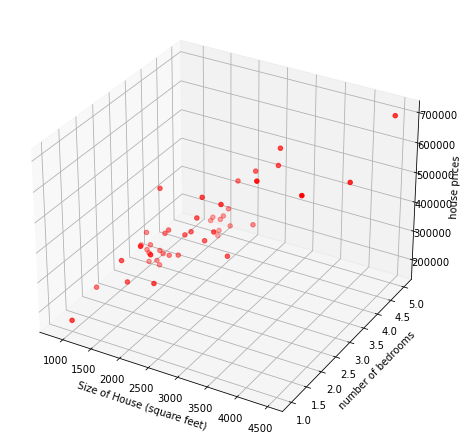

In [97]:
plot_3d()

In [98]:
model2= NormalLR()
params2=model2.fit(X2,Y2)
params2

array([[89597.90954361],
       [  139.21067402],
       [-8738.01911255]])

<ipython-input-82-ed2143fb08a6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


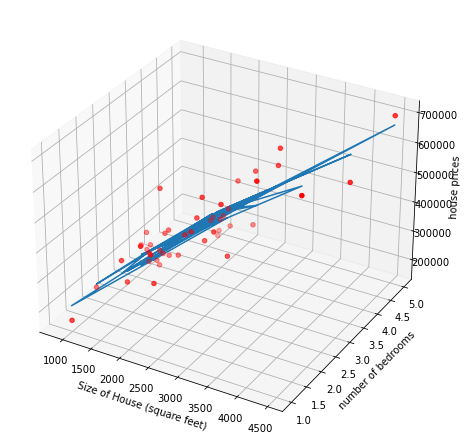

In [99]:
pred2=model2.predict(X2).reshape(-1)
plot_3d(data2[:,:2], pred2, draw_line=True)

<ipython-input-82-ed2143fb08a6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


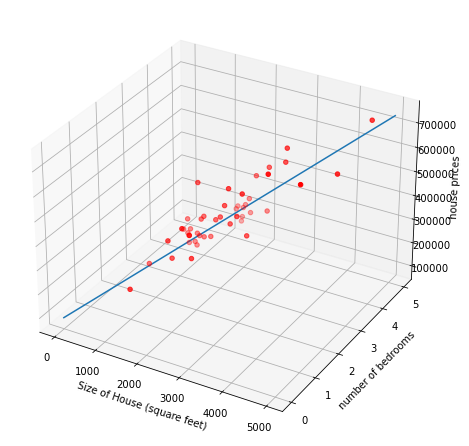

In [100]:
inp = np.concatenate([np.linspace(0,5000,5000).reshape(-1,1),np.linspace(0,5,5000).reshape(-1,1)], axis=1)

pred = model2.predict(inp)
plot_3d(inp,pred.reshape(-1),draw_line=True)

In [106]:
model2.predict([[1640,3],
               [5000,5]])

array([[291689.35759481],
       [741961.18406884]])

## Regularized Normal Linear Regression 

In [114]:
class NormalLinearRegression:
    def __init__(self) -> None:
        self.X = None
        self.Y = None
        self.theta = None

    def fit(self,x,y,lambda_=0):
        self.X = x    
        if self.X.ndim == 1: # adding extra dimension, if X is a 1-D array
            self.X = self.X.reshape(-1,1)       
        # adding extra column of 1s for the bias term
        self.X = np.concatenate([np.ones((self.X.shape[0], 1)), self.X], axis=1)      
        self.Y = y
        self.theta = np.zeros((self.X.shape[1],1))
        self.theta = self.calculate_theta(lambda_=lambda_)
        self.theta = self.theta.reshape(-1,1)
        return self.theta
    def predict(self, x):
        x = np.array(x) # converting list to numpy array
        if x.ndim == 1:
            x = x.reshape(1,-1)
        x = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
        return np.dot(x,self.theta)

    def calculate_theta(self, lambda_):
        y_projection = np.dot(self.X.T, self.Y)
        M = np.identity(self.X.shape[1])
        M[0,0] = 0
        cov = np.dot(self.X.T, self.X) + lambda_*M
        cov_inv = np.linalg.pinv(cov)
        theta_temp = np.dot(cov_inv, y_projection)
        return theta_temp

In [120]:
from sklearn.datasets import make_regression
X,Y=make_regression(n_samples=100,n_features=1,n_informative=1,noise = 10,random_state=10)

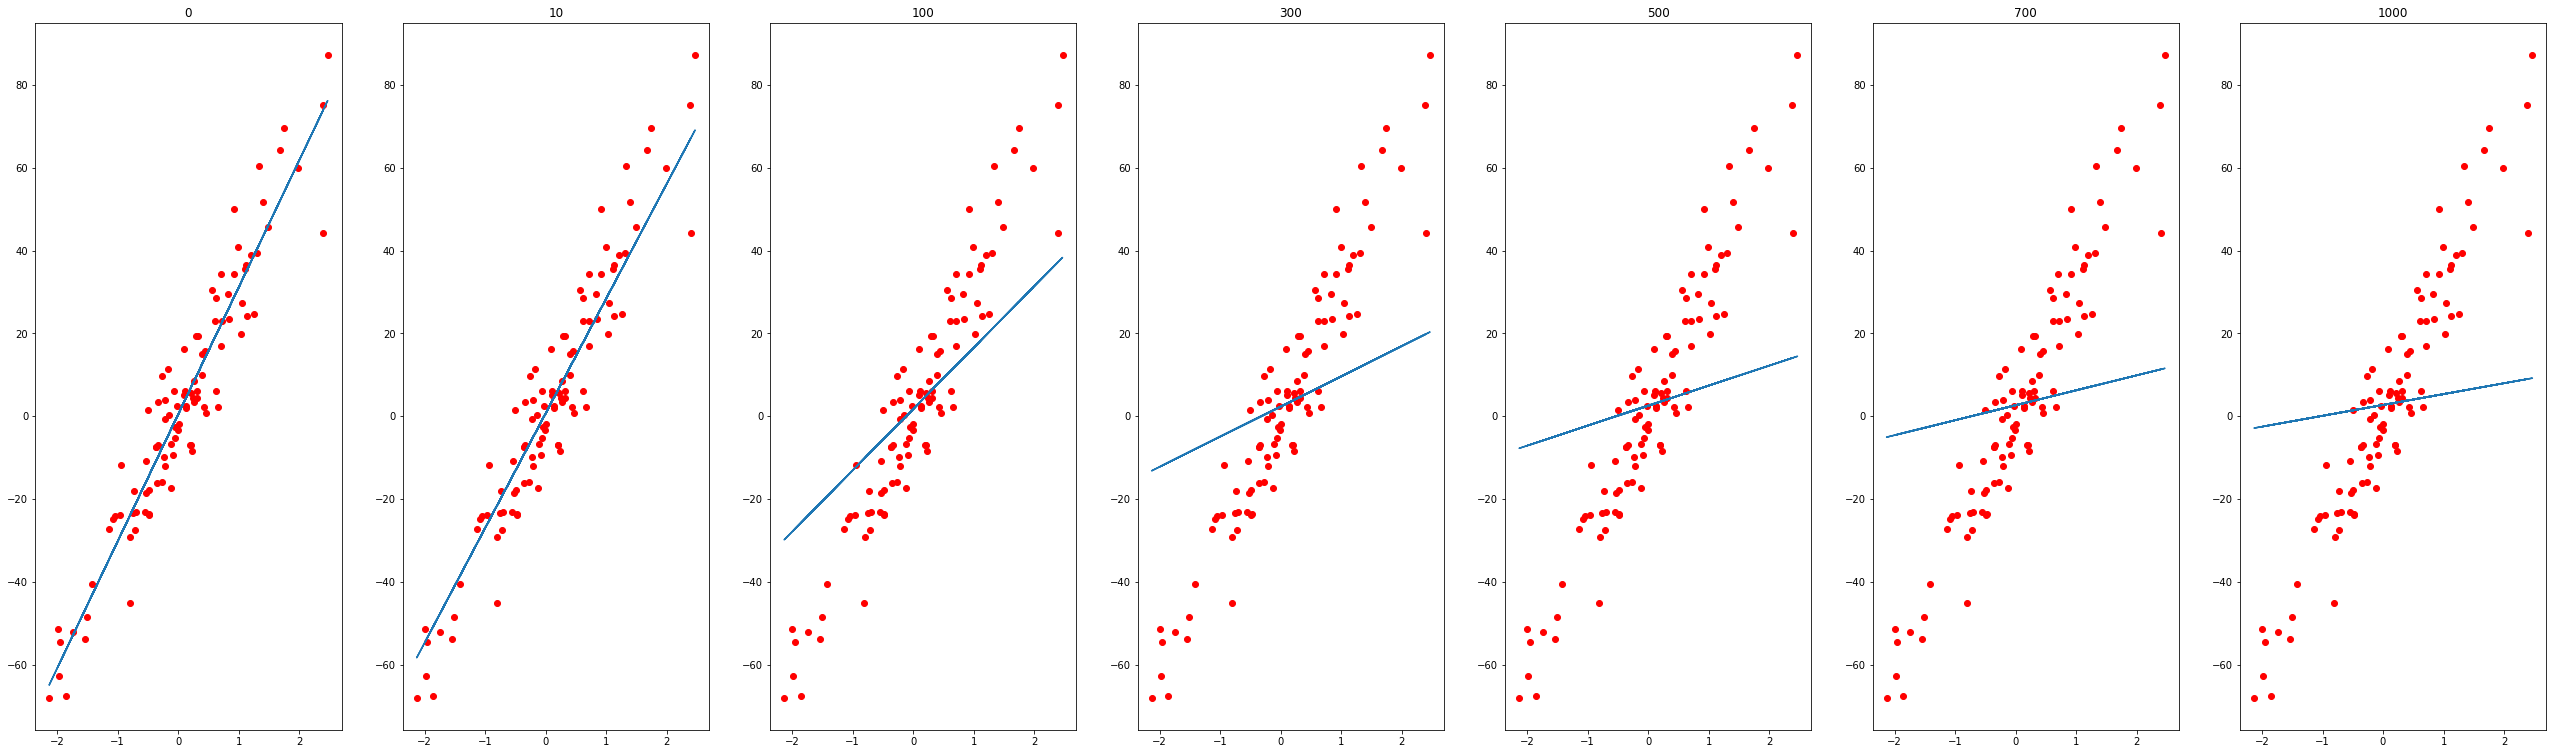

In [121]:
lambdas = [0,10,100,300,500,700,1000]
fig, ax = plt.subplots(1,len(lambdas), figsize=(45,13))
errors = {}
for l in range(len(lambdas)):
    m = X.shape[0]
    model4 = NormalLinearRegression()
    model4.fit(X,Y,lambdas[l])
    preds = model4.predict(X.reshape(-1,1))
    preds = preds.reshape(-1)
    error = np.sqrt(np.mean((preds - Y)**2)) # storing error for each lambda in a list for comparing
    errors[lambdas[l]] = error
    ax[l].scatter(x=X, y=Y, color="red")
    ax[l].plot(X,preds)
    ax[l].set_title(lambdas[l])

In [122]:
errors

{0: 9.279378574384605,
 10: 9.711337591350967,
 100: 17.91189830332804,
 300: 24.433338217681825,
 500: 26.644949057427194,
 700: 27.751689218108318,
 1000: 28.656890547622456}

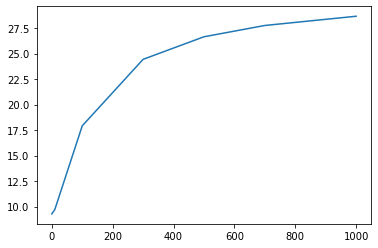

In [123]:
plt.plot(lambdas,errors.values())